In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [40]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [54]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [46]:
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")


X_train shape: (2937, 150, 150, 3)
Y_train shape: (3264,)


In [52]:
import numpy as np
import tensorflow as tf

# Check if y_train and y_test are one-hot encoded
def is_one_hot(encoded_labels):
    return np.array_equal(np.sum(encoded_labels, axis=1), np.ones(encoded_labels.shape[0]))

# Assuming labels is a list of class names
if not is_one_hot(y_train):
    # Convert raw labels to indices and then to categorical
    y_train_new = [labels.index(i) for i in y_train]
    y_train = tf.keras.utils.to_categorical(y_train_new)

    y_test_new = [labels.index(i) for i in y_test]
    y_test = tf.keras.utils.to_categorical(y_test_new)
else:
    # y_train and y_test are already one-hot encoded
    pass


Convolutional Neural Network

In [53]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 69, 69, 64)        0

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
83/83 [==============================] - 234s 3s/step - loss: 0.9784 - accuracy: 0.5887 - val_loss: 1.0329 - val_accuracy: 0.5578
Epoch 2/10
83/83 [==============================] - 234s 3s/step - loss: 0.8475 - accuracy: 0.6462 - val_loss: 0.8583 - val_accuracy: 0.6224
Epoch 3/10
83/83 [==============================] - 234s 3s/step - loss: 0.7476 - accuracy: 0.6860 - val_loss: 0.8379 - val_accuracy: 0.6633
Epoch 4/10
83/83 [==============================] - 235s 3s/step - loss: 0.6453 - accuracy: 0.7287 - val_loss: 0.5766 - val_accuracy: 0.7891
Epoch 5/10
83/83 [==============================] - 233s 3s/step - loss: 0.5840 - accuracy: 0.7556 - val_loss: 0.5669 - val_accuracy: 0.7585
Epoch 6/10
83/83 [==============================] - 230s 3s/step - loss: 0.5046 - accuracy: 0.7904 - val_loss: 0.4530 - val_accuracy: 0.8333
Epoch 7/10
83/83 [==============================] - 233s 3s/step - loss: 0.4641 - accuracy: 0.8093 - val_loss: 0.4956 - val_accuracy: 0.7959
Epoch 8/10
83

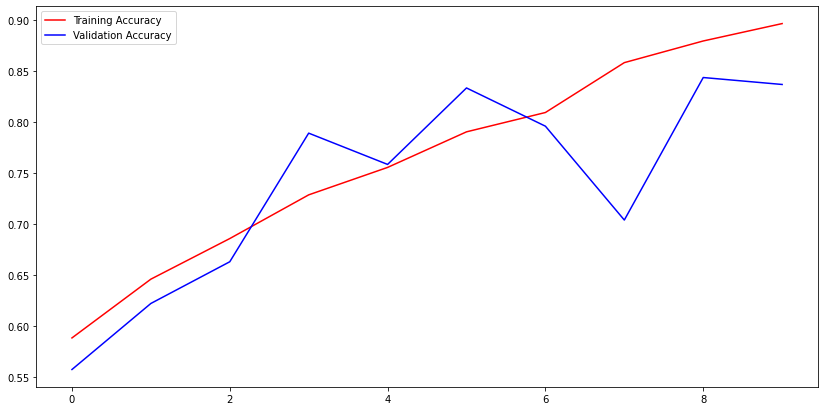

In [32]:
#model.save('braintumor.h5')
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

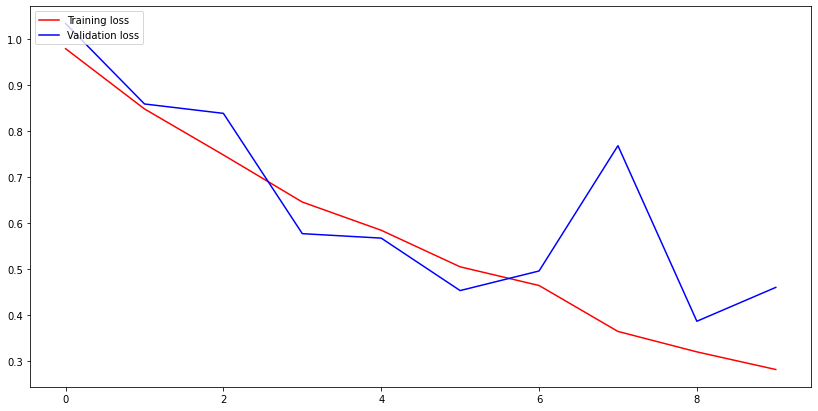

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [34]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

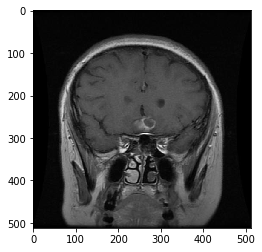

In [37]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [38]:
a=model.predict(img_array)
indices = a.argmax()
indices

3